Q1. Business Case: DMart - Confidence Interval and CLT
About DMart

DMart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. DMart has more than 100 million customers worldwide.


**Business Problem**

The Management team at DMart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Dataset**

The company collected the transactional data of customers who purchased products from the DMart Stores during Black Friday. The dataset has the following features:
Dataset link: DMart_data.csv

User_ID:	User ID
Product_ID:	Product ID
Gender:	Sex of User
Age:	Age in bins
Occupation:	Occupation(Masked)
City_Category:	Category of the City (A,B,C)
StayInCurrentCityYears:	Number of years stay in current city
Marital_Status:	Marital Status
ProductCategory:	Product Category (Masked)
Purchase:	Purchase Amount




**What good looks like?**

Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.

Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)
Do some data exploration steps like:

Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

Inference after computing the average female and male expenses.
Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.

The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.

Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can DMart leverage this conclusion to make changes or improvements?

Perform the same activity for Married vs Unmarried and Age
For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.

Give recommendations and action items to DMart.

In [1]:
import pandas as pd

In [2]:
DMart=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/DMart_data.csv?1641285094")

In [3]:
DMart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
DMart.info()
#there are 5 integer attributes and 5 object data type which are strings, there are a total of 550068 rows or orders data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
#Null values
DMart.isnull().sum()
# there is no null value in dataset, the dataset is clean, divided into bins for age attribute and it is ready for analysis

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [6]:
#unique values
for i in DMart.columns:
  print (i , ":" , DMart[i].nunique())

# There are 3631 products sold under 20 categories in 3 city types
# These are 18105 orders placed by 5891 unique users

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [5]:
DMart['Product_Category']=DMart['Product_Category'].astype('object')
DMart['Occupation']=DMart['Occupation'].astype('object')
DMart['Marital_Status']=DMart['Marital_Status'].astype('object')
DMart.info()
# we have converted categorical attributes - product category, occupation and marital status to object data type for analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


We see that the data is non null, we will now do outlier analysis using describe method and box plots

Describe method shows that there are 

1.Unique Values: There are 3631 unique products, 7 unique age groups, 2 unique genders, 3 unique cities, 5 unique stay in current city years, 20 unique product categories and 21 unique occupations

**There are 3631 products sold under 20 categories in 3 city types**

**These are 18105 orders placed by 5891 unique users**

2. The outliers can be checked only for purchase value variable, as it is the only appropriate variable for this analysis. 
here we see that there is a huge difference of around 3000 bucks in mean and median values. which means that the purchase value has a hige spread, which we will see in box plot.

3. the top orders are from- Male in gender, 26-35 age group people,P00265242 is the highest selling product, most orders are from B city category, product category 5 is highest selling,most orders are from unmarried people, most  customers have occupation code 4. 
The count of these top buyers can be seen in describe 'freq' attribute

4. We see that max purchase value is 23961 bucks and min purchase value is 12 bucks

In [8]:
DMart.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,NaN,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,NaN,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,1.003029e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,1.727592e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,1.001516e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


In [9]:
# Value Counts - we see that majority of orders are from males (75%)
DMart['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [10]:
DMart['Gender'].value_counts()/len(DMart)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [11]:
pd.DataFrame(DMart.groupby('Gender')['User_ID'].nunique()).reset_index()
#We find actual number of buyers by gender using unique user_id

,Gender,User_ID
0,F,1666
1,M,4225


In [12]:
F=1666/(1666+4225)
F
#Females buyers - 28%, Male buyers72%

0.2828042777117637

In [13]:
# Value Counts - we see that majority of orders are from unmarried (60%)
DMart['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [14]:
# Value Counts - we see that majority of orders are from city category B - 42% on black friday
DMart['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

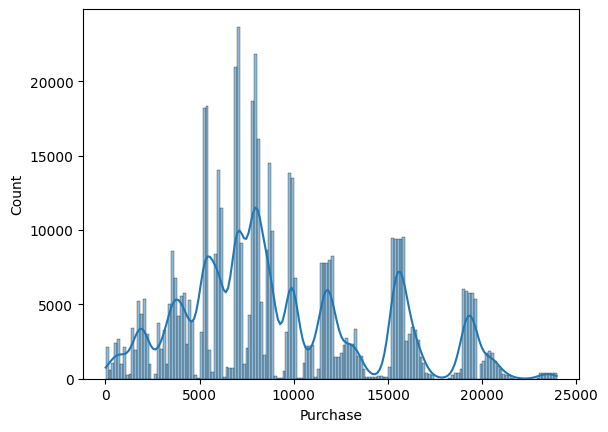

In [ ]:
#Univariate Analysis

sns.histplot(data=DMart,x='Purchase',kde=True)

#used histplot instead of distplot as it is deprecated
#maximum orders have purchase value in range 5000-10000 bucks

<Axes: xlabel='Age', ylabel='User_ID'>

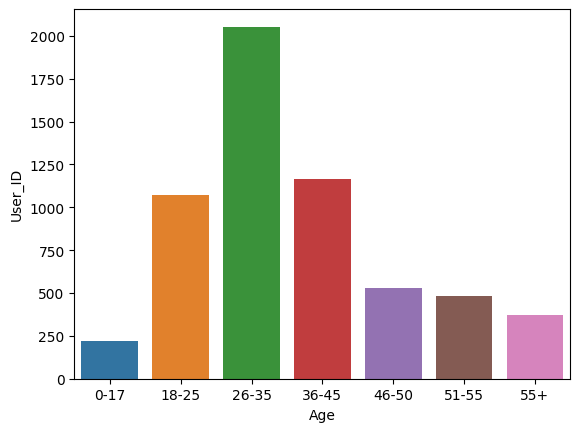

In [ ]:
age=pd.DataFrame(DMart.groupby('Age')['User_ID'].nunique()).reset_index()
sns.barplot(data=age,x='Age',y='User_ID')

# here we have considered unique user_ID values to avoid errors due to duplicacy
# maximum buyers are in age group of 26-35
# in total there are 5891 customers

<Axes: xlabel='Age', ylabel='count'>

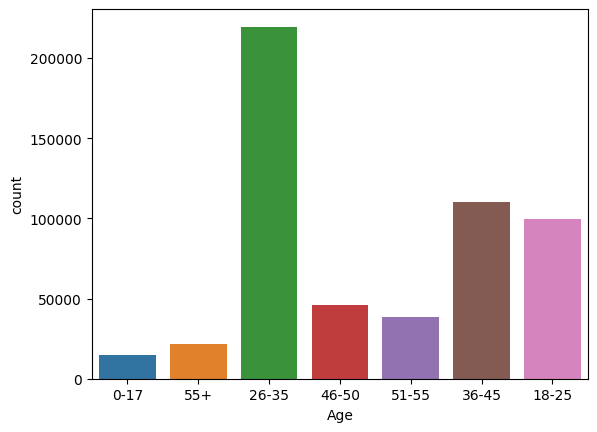

In [ ]:
sns.countplot(data=DMart,x='Age')
#maximum orders are also in age group of 26-35

In [ ]:
DMart.Product_Category.value_counts()[:5]
# these are top 5 product categories

5     150933
1     140378
8     113925
11     24287
2      23864
Name: Product_Category, dtype: int64

In [ ]:
DMart.Product_Category.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

<Axes: xlabel='count', ylabel='Product_Category'>

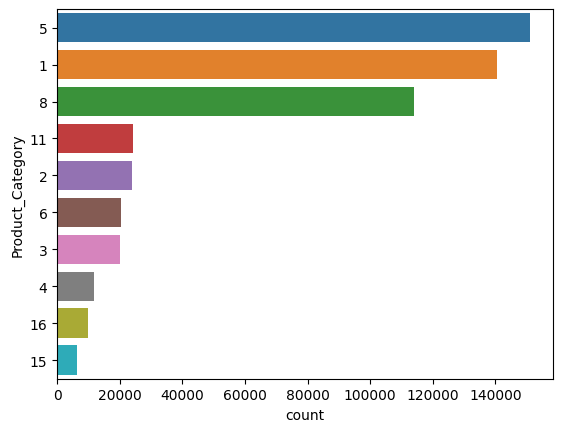

In [15]:
import seaborn as sns
sns.countplot(data=DMart,y='Product_Category',order=DMart['Product_Category'].value_counts().index[0:10])

# 5,1 and 8 are top selling product categories on black friday

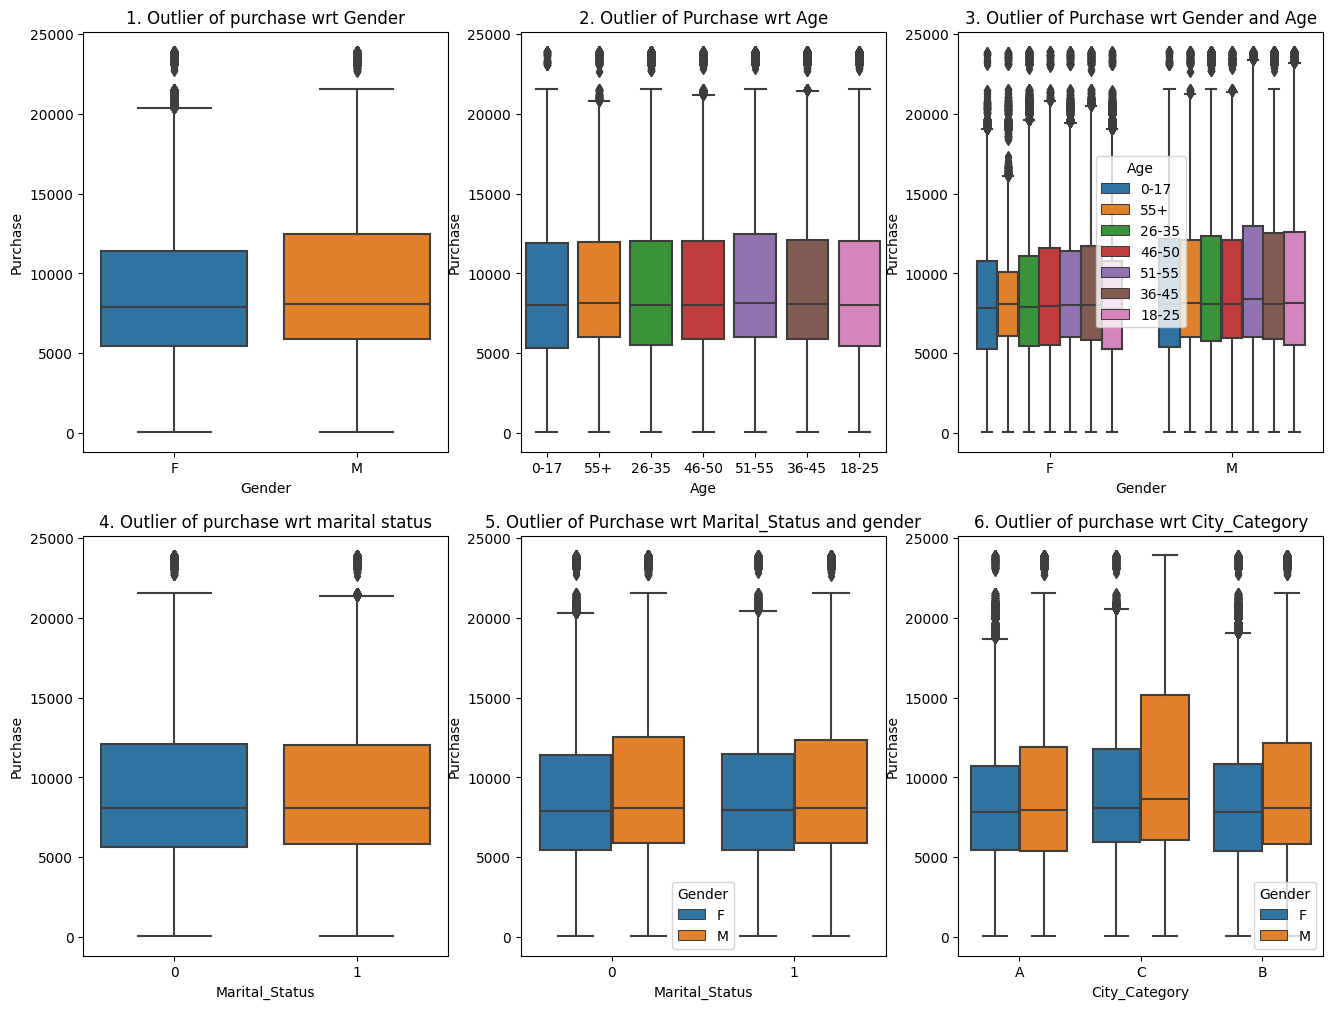

In [ ]:
#Bivariate and Outlier Analysis of purchase values wrt different attributes

plt.figure(figsize=(16,12))

plt.subplot(2,3,1)
sns.boxplot(data=DMart,y='Purchase',x='Gender')
plt.title("1. Outlier of purchase wrt Gender")

plt.subplot(2,3,2)
sns.boxplot(data=DMart,y='Purchase',x='Age')
plt.title("2. Outlier of Purchase wrt Age")

plt.subplot(2,3,3)
sns.boxplot(data=DMart,y='Purchase',x='Gender',hue='Age')
plt.title("3. Outlier of Purchase wrt Gender and Age")

plt.subplot(2,3,4)
sns.boxplot(data=DMart,y='Purchase',x='Marital_Status')
plt.title("4. Outlier of purchase wrt marital status")

plt.subplot(2,3,5)
sns.boxplot(data=DMart,y='Purchase',x='Marital_Status',hue='Gender')
plt.title("5. Outlier of Purchase wrt Marital_Status and gender")

plt.subplot(2,3,6)
sns.boxplot(data=DMart,y='Purchase',x='City_Category',hue='Gender')
plt.title("6. Outlier of purchase wrt City_Category")

plt.show()

#Insights and recommendations:

1. The box plot of purchase value verses gender shows that outliers for female lie above 20000 and those for male lie above 23000 bucks. 
Also more males have comparatively higher purchase value than females as shown by 75th percentile for male 13000 and that for females 12000 bucks

2. There is not much difference in outlier of purchase value across age groups

3. Outliers of purchase value wrt age groups and gender shows that females have lower IQR by 3000-4000 bucks in all age groups compared to male. And the difference between IQR in both genders is largest in 18-25 and 55+ age groups. This means females in age groups 18-25 and 55+ have much lesser purchase value compared to males in same age group.

4. The purchase value outliers across marital status does not change much. married and unmarried people both have similar buying habits

5. The purchase value outliers across marital status and gender does not change much. married and unmarried people both have similar buying habits wrt gender

6. Males in city category C are high value purchasers forllowed by females in city category C

In [ ]:
#sns.heatmap(DMart.corr(),annot=True)

# Gender based analysis

We bifurcate dataset into female and male orders

In [12]:
female=DMart.loc[DMart['Gender']=='F']
len(female)

135809

In [13]:
male=DMart.loc[DMart['Gender']=='M']
len(male)

414259

In [14]:
import numpy as np
np.mean(female['Purchase'])

8734.565765155476

In [15]:
np.mean(male['Purchase'])

9437.526040472265

**These population mean show that Males are spending more than females**

we can see that men are spending more money per transaction than women in given population dataset

In [19]:
#getting a bootstrap male and female sample
n=300
bootstrapped_female=np.random.choice(female['Purchase'],size=n)
bootstrapped_male=np.random.choice(male['Purchase'],size=n)
fmean=np.mean(bootstrapped_female)
mmean=np.mean(bootstrapped_male)
print(fmean,mmean)

8735.926666666666 9544.84


Text(0.5, 1.0, 'distribution of mean purchase by female')

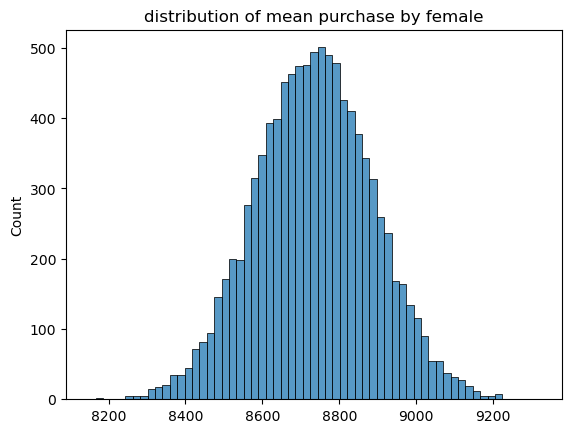

In [20]:
#getting bootstrapped samples, means with repetition

bootstrapped_mean_female=[]
bootstrapped_mean_male=[]
n=1000

for i in range(10000):
  bootstrapped_female=np.random.choice(female['Purchase'],size=n)
  bootstrapped_male=np.random.choice(male['Purchase'],size=n)

  fmean=np.mean(bootstrapped_female)
  mmean=np.mean(bootstrapped_male)

  bootstrapped_mean_female.append(fmean)
  bootstrapped_mean_male.append(mmean)

import matplotlib.pyplot as plt
sns.histplot(bootstrapped_mean_female)
plt.title('distribution of mean purchase by female')

Text(0.5, 1.0, 'distribution of mean purchase by male')

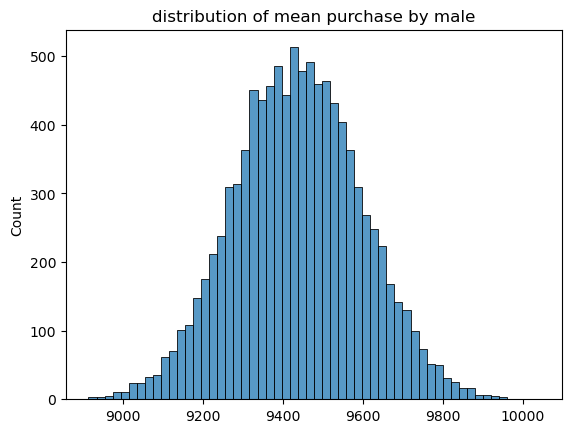

In [21]:
sns.histplot(bootstrapped_mean_male)
plt.title('distribution of mean purchase by male')

In [26]:
#computing mean and standard deviation of bootstrapped sample

mu_f=np.mean(bootstrapped_mean_female)
mu_m=np.mean(bootstrapped_mean_male)

sigma_f=np.std(bootstrapped_mean_female)
sigma_m=np.std(bootstrapped_mean_male)

print(mu_f,mu_m)
print(sigma_f,sigma_m)
#print(np.std(female['Purchase'])/300**0.5,np.std(male['Purchase']))


8733.9668406 9437.102903199999
153.18439250878592 159.33416373428213
275.23532896291283 5092.180063635943


In [62]:
from scipy.stats import norm
#computing range for 95% CI

alpha=0.05

#getting left and right Z scores

zleft=norm.ppf(0.025)
zright=norm.ppf(0.975)

#getting x value for these z values
xleft=(zleft*sigma_f)+mu_f
xright=(zright*sigma_f)+mu_f

print("We can say with 95% confidence that the mean expenses of women lies in range :")
print(xleft,xright)

We can say with 95% confidence that the mean expenses of women lies in range :
8439.924671260584 9033.294939739413


In [63]:
xleft_m=np.percentile(bootstrapped_mean_male,2.5)
xright_m=np.percentile(bootstrapped_mean_male,97.5)

print("We can say with 95% confidence that the mean expenses of men lies in range :")
print(xleft_m,xright_m)

We can say with 95% confidence that the mean expenses of men lies in range :
9120.227574999999 9750.9277


# CI 90%

In [64]:
np.percentile(bootstrapped_mean_female,[0.05,95])

array([8271.120672, 8986.32305 ])

In [65]:
np.percentile(bootstrapped_mean_male,[0.05,95])

array([8921.478766, 9697.6367  ])

In [128]:
#overlap in interval
np.percentile(bootstrapped_mean_female,95)-np.percentile(bootstrapped_mean_male,0.05)

64.8442840000007

# CI 95%

In [66]:
np.percentile(bootstrapped_mean_female,[0.025,97.5])

array([8244.7550775, 9033.67965  ])

In [67]:
np.percentile(bootstrapped_mean_male,[0.025,97.5])

array([8882.20410075, 9750.9277    ])

In [125]:
#overlap in interval
np.percentile(bootstrapped_mean_female,97.5)-np.percentile(bootstrapped_mean_male,0.025)

151.47554924999895

# CI 99%

In [68]:
np.percentile(bootstrapped_mean_female,[0.005,99.5])

array([8121.55925815, 9129.443755  ])

In [69]:
np.percentile(bootstrapped_mean_male,[0.005,99.5])

array([8815.1331379, 9850.7366   ])

In [127]:
#overlap in interval
np.percentile(bootstrapped_mean_female,99.5)-np.percentile(bootstrapped_mean_male,0.005)

314.31061709999994

# Insights and recommendations

1. The overlapping region is almost nil. So wallmart needs to devise separate strategy for female purchase values and separate startegy for male purchase values

# Central Limit Theorm

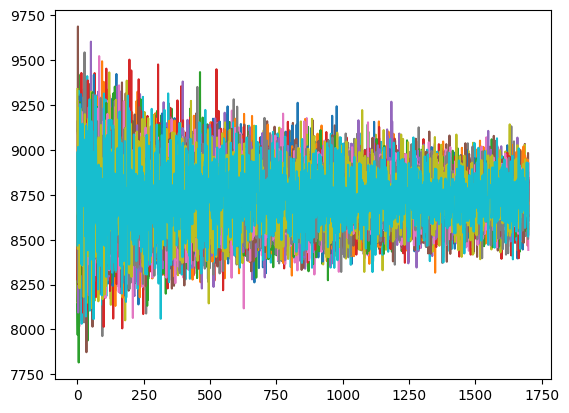

In [129]:
#variation due to sample size

sample_mean_col=[]
for person in range(20):
  for sample_size in range(300,2000):
    sample_mean=female['Purchase'].sample(sample_size).mean()
    sample_mean_col.append(sample_mean)
  plt.plot(sample_mean_col)
  sample_mean_col=[]

<Axes: ylabel='Count'>

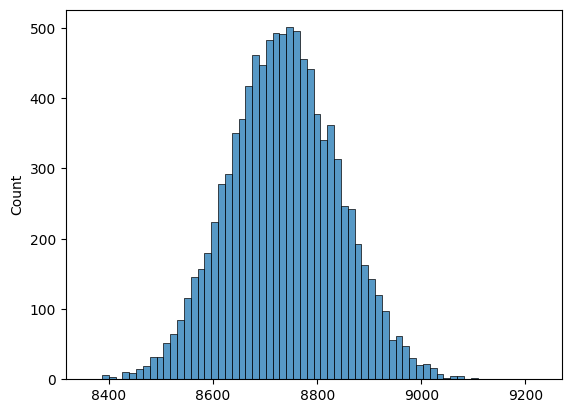

In [135]:
#Female mean
sample_size=2000
sample_mean_coll=[]
for person in range(10000):
  sample_mean=female['Purchase'].sample(sample_size).mean()
  sample_mean_coll.append(sample_mean)
sns.histplot(sample_mean_coll)

<Axes: ylabel='Count'>

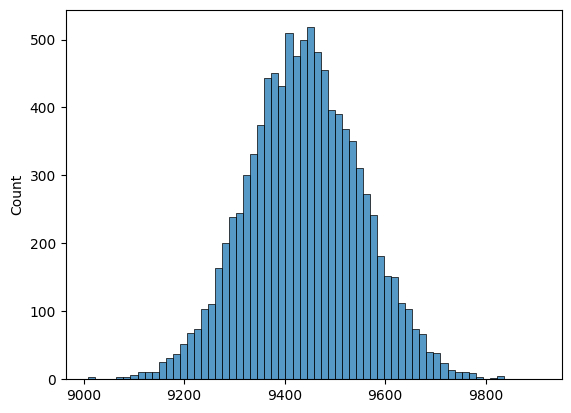

In [136]:
#Male
sample_size=2000
sample_mean_coll_m=[]
for person in range(10000):
  sample_mean=male['Purchase'].sample(sample_size).mean()
  sample_mean_coll_m.append(sample_mean)
sns.histplot(sample_mean_coll_m)

In [140]:
population_mean=np.mean(female['Purchase'])
sigma=np.std(female['Purchase'])

alpha=0.1

#getting left and right Z scores

zleft=norm.ppf(0.05)
zright=norm.ppf(0.95)

#getting x value for these z values
xleft=(zleft*sigma/(2000**0.5))+population_mean
xright=(zright*sigma/(2000**0.5))+population_mean

print("We can say with 90% confidence that the mean expenses of women lies in range :")
print(xleft,xright)

We can say with 90% confidence that the mean expenses of women lies in range :
8559.227354694782 8909.90417561617


#CI 90%

In [141]:
np.percentile(sample_mean_coll,[0.05,95])

array([8396.63021025, 8910.51975   ])

In [142]:
np.percentile(sample_mean_coll_m,[0.05,95])

array([9071.91500125, 9627.3889    ])

In [143]:
#overlap in interval
np.percentile(sample_mean_coll,95)-np.percentile(sample_mean_coll_m,0.05)

-161.39525125000182

#CI 95%

In [144]:
np.percentile(sample_mean_coll,[0.025,97.5])

array([8391.02916875, 8942.4926375 ])

In [145]:
np.percentile(sample_mean_coll_m,[0.025,97.5])

array([9026.82740488, 9663.3420375 ])

In [146]:
#overlap in interval
np.percentile(sample_mean_coll,97.5)-np.percentile(sample_mean_coll_m,0.025)

-84.33476737500132

#CI 99%

In [147]:
np.percentile(sample_mean_coll,[0.005,99.5])

array([8374.2796166, 9010.6449975])

In [148]:
np.percentile(sample_mean_coll_m,[0.005,99.5])

array([9012.10394197, 9728.6684125 ])

In [149]:
#overlap in interval
np.percentile(sample_mean_coll,99.5)-np.percentile(sample_mean_coll_m,0.005)

-1.458944474999953

# Insights and recommendations

1. The overlapping region is nil. So wallmart needs to devise separate strategy for female purchase values and separate startegy for male purchase value.

# Why are women spending less than men

to analyze this we look at 
1.top product categories of men and women

--we see that out of 5, 4 top product categories of men and women orders are same. From this we can conclude that women tend to buy lower value products compared to men.

2.expenses of married and unmarried women and men - this will help us check if married women are billing on their husband's name or their husband's are buying for them

In [40]:
female['Product_Category'].value_counts()[:5]

5    41961
8    33558
1    24831
3     6006
2     5658
Name: Product_Category, dtype: int64

In [41]:
male['Product_Category'].value_counts()[:5]

1     115547
5     108972
8      80367
11     19548
2      18206
Name: Product_Category, dtype: int64

In [18]:
married_women=DMart.loc[(DMart['Marital_Status']==1)&(DMart['Gender']=='F')]
unmarried_women=DMart.loc[(DMart['Marital_Status']==0)&(DMart['Gender']=='F')]
married_men=DMart.loc[(DMart['Marital_Status']==1)&(DMart['Gender']=='M')]
unmarried_men=DMart.loc[(DMart['Marital_Status']==0)&(DMart['Gender']=='M')]

<AxesSubplot:ylabel='Count'>

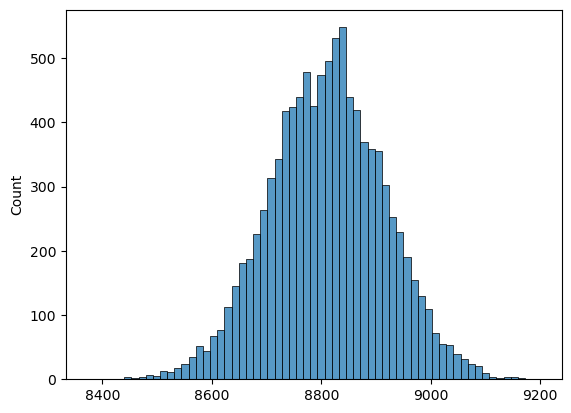

In [19]:
#Married women mean
sample_size=2000
sample_mean_coll_mrw=[]
for person in range(10000):
  sample_mean=married_women['Purchase'].sample(sample_size).mean()
  sample_mean_coll_mrw.append(sample_mean)
sns.histplot(sample_mean_coll_mrw)

<AxesSubplot:ylabel='Count'>

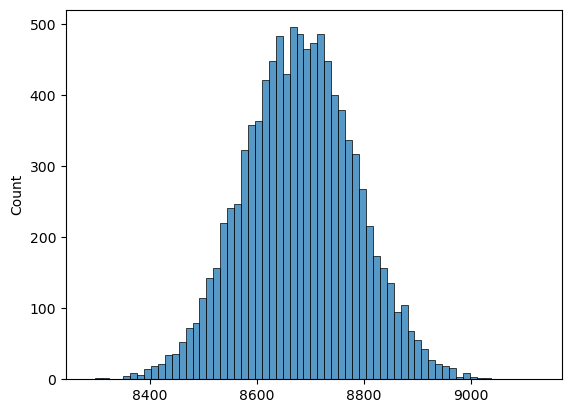

In [29]:
#Unmarried women mean
sample_size=2000
sample_mean_coll_umrw=[]
for person in range(10000):
  sample_mean=unmarried_women['Purchase'].sample(sample_size).mean()
  sample_mean_coll_umrw.append(sample_mean)
sns.histplot(sample_mean_coll_umrw)

# CI 90%

In [22]:
import numpy as np
np.percentile(sample_mean_coll_mrw,[0.05,95])

array([8465.12594875, 8981.341     ])

In [30]:
np.percentile(sample_mean_coll_umrw,[0.05,95])

array([8330.095314, 8853.46805 ])

<AxesSubplot:ylabel='Count'>

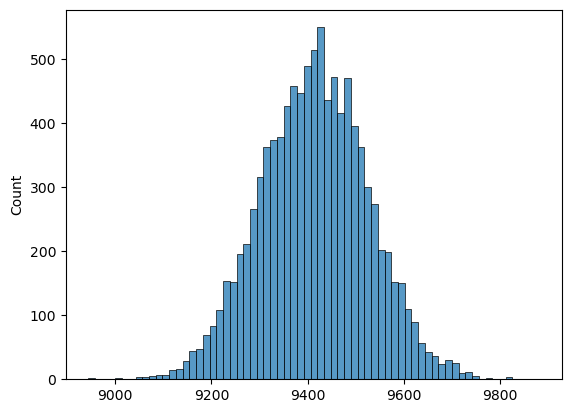

In [24]:
#Married men mean
sample_size=2000
sample_mean_coll_mrm=[]
for person in range(10000):
  sample_mean=married_men['Purchase'].sample(sample_size).mean()
  sample_mean_coll_mrm.append(sample_mean)
sns.histplot(sample_mean_coll_mrm)

<AxesSubplot:ylabel='Count'>

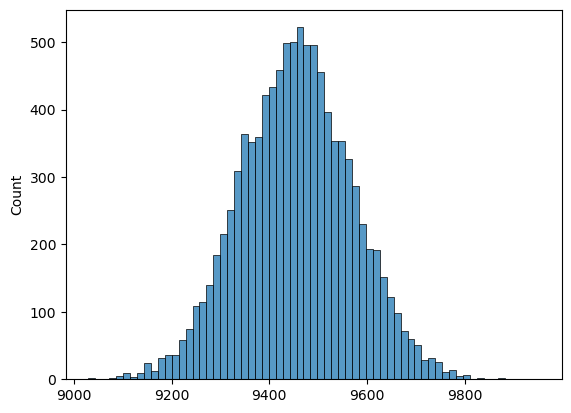

In [31]:
#Unmarried men mean
sample_size=2000
sample_mean_coll_umrm=[]
for person in range(10000):
  sample_mean=unmarried_men['Purchase'].sample(sample_size).mean()
  sample_mean_coll_umrm.append(sample_mean)
sns.histplot(sample_mean_coll_umrm)

In [26]:
np.percentile(sample_mean_coll_mrm,[0.05,95])

array([9045.671916, 9596.381125])

In [32]:
np.percentile(sample_mean_coll_umrm,[0.05,95])

array([9086.60052475, 9643.97865   ])

# overlap in interval

We see that the mean purchase interval for married and unmarried women overlaps. similarly the mean purchase interval of married men and unmarried men also fully overlaps.

So we cannot say that women are billing on men's name or men are buying for women.

We can only say that women buy low value products compared to men

# Marital_Status

In [89]:
married=DMart.loc[DMart['Marital_Status']==0]
len(married)

324731

In [90]:
unmarried=DMart.loc[DMart['Marital_Status']==1]
len(unmarried)

225337

<Axes: ylabel='Count'>

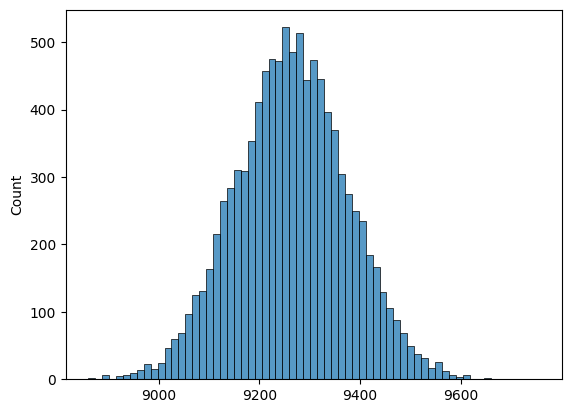

In [150]:
#Married mean
sample_size=2000
sample_mean_coll_mr=[]
for person in range(10000):
  sample_mean=married['Purchase'].sample(sample_size).mean()
  sample_mean_coll_mr.append(sample_mean)
sns.histplot(sample_mean_coll_mr)

<Axes: ylabel='Count'>

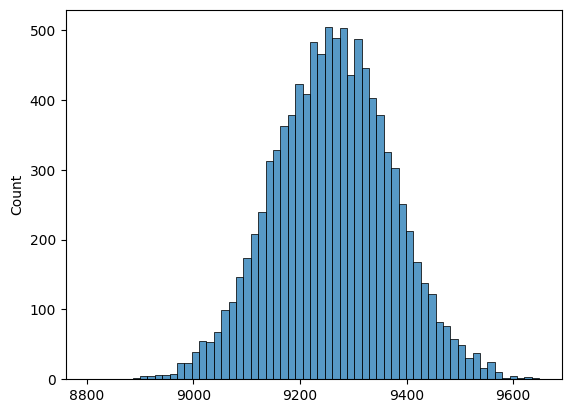

In [151]:
#Unmarried mean
sample_size=2000
sample_mean_coll_umr=[]
for person in range(10000):
  sample_mean=unmarried['Purchase'].sample(sample_size).mean()
  sample_mean_coll_umr.append(sample_mean)
sns.histplot(sample_mean_coll_umr)

#CI 90%

In [152]:
np.percentile(sample_mean_coll_mr,[0.05,95])

array([8896.01148125, 9448.487625  ])

In [153]:
np.percentile(sample_mean_coll_umr,[0.05,95])

array([8892.244277, 9443.426   ])

#CI 95%

In [154]:
np.percentile(sample_mean_coll_mr,[0.025,97.5])

array([8886.98815475, 9482.380175  ])

In [155]:
np.percentile(sample_mean_coll_umr,[0.025,97.5])

array([8873.58353863, 9480.311375  ])

#CI 99%

In [156]:
np.percentile(sample_mean_coll_mr,[0.005,99.5])

array([8863.66842838, 9554.2614625 ])

In [157]:
np.percentile(sample_mean_coll_umr,[0.005,99.5])

array([8825.43200752, 9550.2396625 ])

#Insights and recommendations

1. The mean purchase value interval almost fully overlaps for married and unmarried customers, wallmart can deploy same strategy for both customers

# Age group - 26-35 highest selling

In [101]:
age=DMart.loc[DMart['Age']=='26-35']
len(age)

219587

In [103]:
age_other=DMart.loc[DMart['Age']!='26-35']
len(age_other)

330481

<Axes: ylabel='Count'>

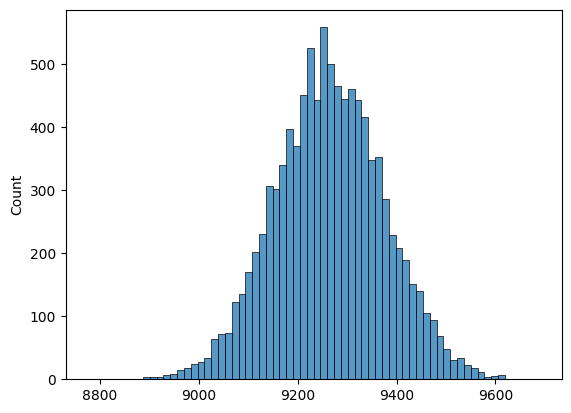

In [158]:
#26-35 age mean
sample_size=2000
sample_mean_coll_age=[]
for person in range(10000):
  sample_mean=married['Purchase'].sample(sample_size).mean()
  sample_mean_coll_age.append(sample_mean)
sns.histplot(sample_mean_coll_age)

<Axes: ylabel='Count'>

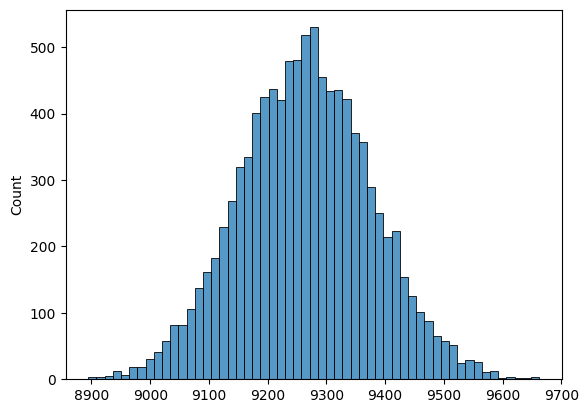

In [159]:
#remaining age groups mean
sample_size=2000
sample_mean_coll_ager=[]
for person in range(10000):
  sample_mean=married['Purchase'].sample(sample_size).mean()
  sample_mean_coll_ager.append(sample_mean)
sns.histplot(sample_mean_coll_ager)

#CI 90%

In [160]:
np.percentile(sample_mean_coll_age,[0.05,95])

array([8908.2409715, 9448.81065  ])

In [161]:
np.percentile(sample_mean_coll_ager,[0.05,95])

array([8921.251501, 9449.866025])

#CI 95%

In [162]:
np.percentile(sample_mean_coll_age,[0.025,97.5])

array([8890.6618215, 9481.8273875])

In [163]:
np.percentile(sample_mean_coll_ager,[0.025,97.5])

array([8905.00043225, 9487.13005   ])

#CI 99%

In [164]:
np.percentile(sample_mean_coll_age,[0.005,99.5])

array([8822.17962917, 9545.1851075 ])

In [165]:
np.percentile(sample_mean_coll_ager,[0.005,99.5])

array([8894.479996 , 9556.8599325])

#Insights and recommendations

1. The mean intervals for all age bins are overlapping with highest selling age bin, Wallmart can use the same strategy for all age bins

#Notes

Evaluation Criteria

Defining Problem Statement and Analyzing basic metrics (10 Points)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
Non-Graphical Analysis: Value counts and unique attributes ​
Visual Analysis - Univariate & Bivariate
For continuous variable(s): Distplot, countplot, histogram for univariate analysis
For categorical variable(s): Boxplot
For correlation: Heatmaps, Pairplots
Missing Value & Outlier Detection (10 Points)
Business Insights based on Non- Graphical and Visual Analysis (10 Points)
Comments on the range of attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plot
Answering questions (50 Points)
Are women spending more money per transaction than men? Why or Why not? (10 Points)
Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)
Are confidence intervals of average male and female spending overlapping? How can DMart leverage this conclusion to make changes or improvements? (10 Points)
Results when the same activity is performed for Married vs Unmarried (10 Points)
Results when the same activity is performed for Age (10 Points)
Final Insights (10 Points) - Illustrate the insights based on exploration and CLT
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plots
Comments on different variables when generalizing it for Population
Recommendations (10 Points)
Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand
Submission Process:

Type your insights and recommendations in the text editor.
Convert your jupyter notebook into PDF (Save as PDF using Chrome browser’s Print command), upload it in your Google Drive (set the permission to allow public access), and paste that link in the text editor.
Optionally, you may add images/graphs in the text editor by taking screenshots or saving matplotlib graphs using plt.savefig(...).
After submitting, you will not be allowed to edit your submission.

